<a href="https://colab.research.google.com/github/armandotorresj1/AG1/blob/master/Visualizacion_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [0]:
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [45]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.3+ KB


In [0]:
#error en clase
titanic.rename(columns={'pclass': 'clase'}, inplace=True)
titanic.rename(columns={'fare': 'tarifa'}, inplace=True)

In [46]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [50]:
#Consulta con condiciones
titanic[
 (titanic.sex == 'female')
 & (titanic['clase'].isin(['1','2']))
 & (titanic.age > 35 )
 & (titanic.survived == 0)
]

,survived,clase,sex,age,sibsp,parch,tarifa,embarked,class,who,adult_male,deck,embark_town,alive,alone
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True
357,0,2,female,38.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,no,True
772,0,2,female,57.0,0,0,10.5000,S,Second,woman,False,E,Southampton,no,True
854,0,2,female,44.0,1,0,26.0000,S,Second,woman,False,NaN,Southampton,no,False


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


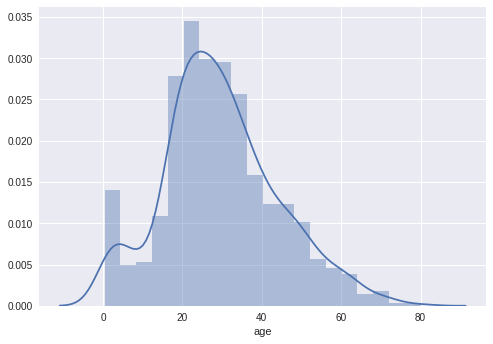

In [51]:
sns.distplot (titanic.age.dropna( ))
sns.plt.show ( )

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


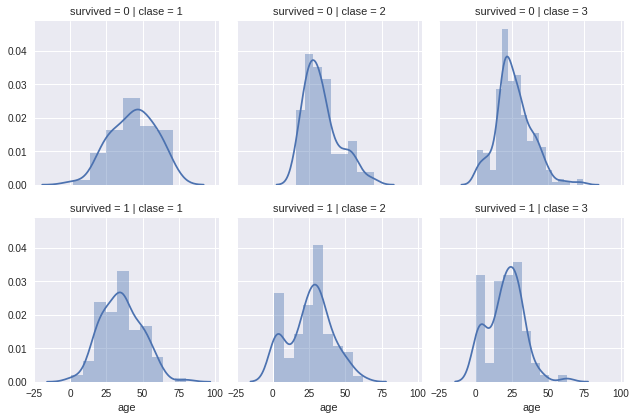

In [53]:
sns.set(font_scale=1)
g = sns.FacetGrid(titanic, row='survived',col='clase')
g.map(sns.distplot, "age")
sns.plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


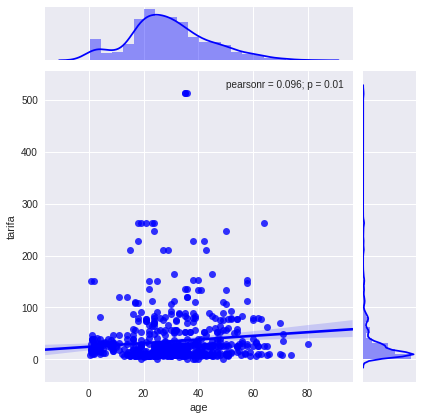

In [57]:
#Diagrama de dispersion con Distribucion de cada variable: tarifa(precio)/age(edad)
sns.jointplot(data=titanic, x='age', y='tarifa',
kind='reg', color='b')
sns.plt.show()

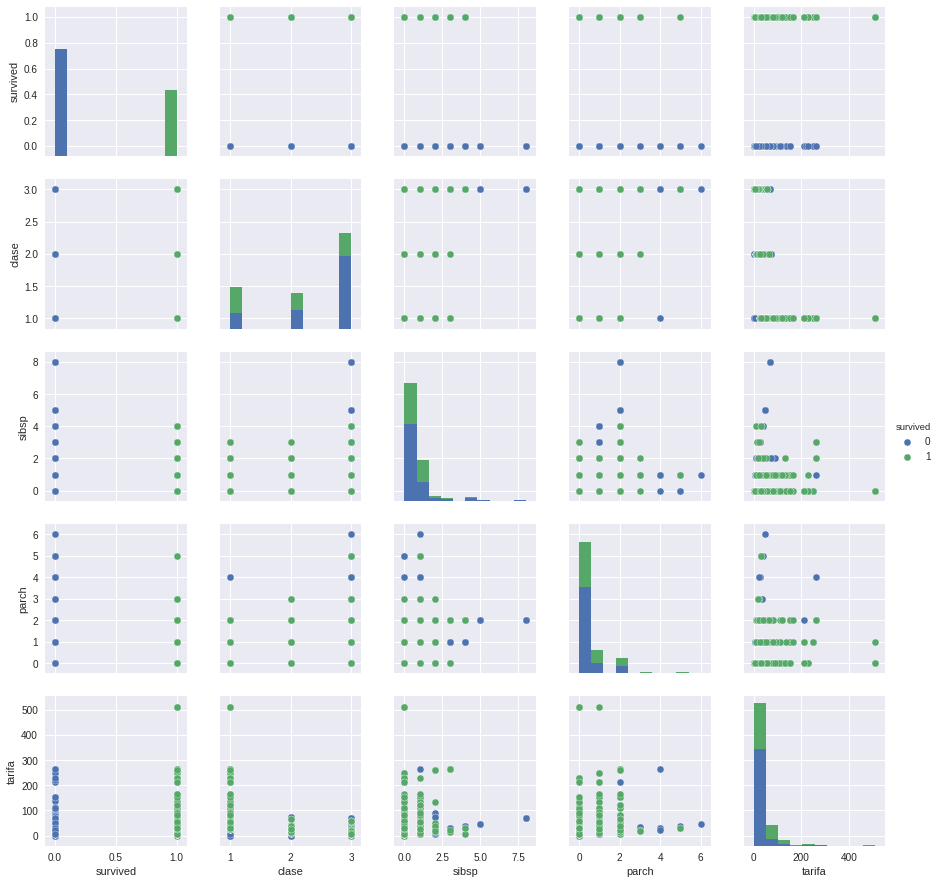

In [61]:
#Define un subconjuto de datos con las variables numéricas 
titanic_num = titanic[['survived','clase','sibsp','parch','tarifa']]

#Hace una matriz de diagramas de dispersión de parejas de variables.
sns.pairplot(titanic_num, hue="survived")
sns.plt.show()

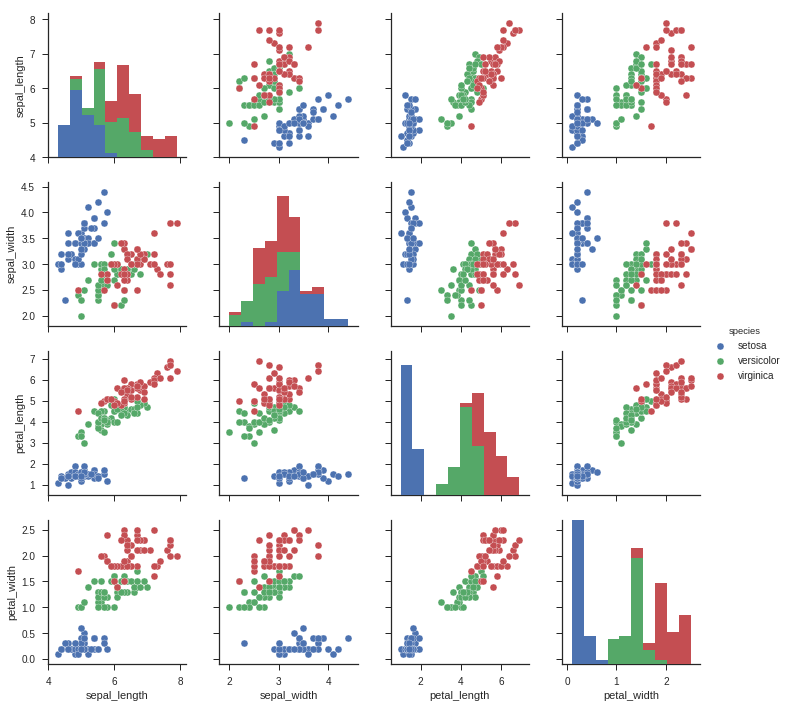

In [62]:
sns.set(style="ticks")
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")